# Students_Sentiment_Analysis

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


### Importing dataset CSV file 

In [2]:
data = pd.read_csv(r"XII Board Exams-2021.csv")
data.head(2)

,Timestamp,Which board you are part of?,How do you feel when you are not aware of the status of your board exams? You may select more than one option given below:,What is your opinion about Class XII board exams?,"State the reasons for why do you want the exams to be cancelled? (Safety, Status of mind, Future plans, Health etc.)","State the reasons for why do you want the exams to be conducted on a later date? (Safety, Status of mind, Future plans, Entrance Exams, Health etc.)",Name the state from which you will be giving your XII Board exam(eg: Karnataka)
0,2021/05/14 6:47:27 PM GMT+5:30,ICSE,Anxious;Uncertain;Stress,Cannot Say,NaN,NaN,Kerala
1,2021/05/14 6:58:16 PM GMT+5:30,CBSE,Depressed;Uncertain;Inability to concentrate;C...,Should be cancelled,Health of my grandparents and family. I don't ...,NaN,KARNATAKA


### New header for each attribute

In [3]:
new_header = {'Timestamp':'timestamp','Which board you are part of?':'syllabus','How do you feel when you are not aware of the status of your board exams? You may select more than one option given below:':'emotion','What is your opinion about Class XII board exams?':'opinion','State the reasons for why do you want the exams to be cancelled? (Safety, Status of mind, Future plans, Health etc.)':'reason_cancelling','State the reasons for why do you want the exams to be conducted on a later date? (Safety, Status of mind, Future plans, Entrance Exams, Health etc.)':'reason_conducting_late','Name the state from which you will be giving your XII Board exam(eg: Karnataka)':'state'}
datanew = data.rename(columns=new_header,inplace=False)
datanew.head()

,timestamp,syllabus,emotion,opinion,reason_cancelling,reason_conducting_late,state
0,2021/05/14 6:47:27 PM GMT+5:30,ICSE,Anxious;Uncertain;Stress,Cannot Say,NaN,NaN,Kerala
1,2021/05/14 6:58:16 PM GMT+5:30,CBSE,Depressed;Uncertain;Inability to concentrate;C...,Should be cancelled,Health of my grandparents and family. I don't ...,NaN,KARNATAKA
2,2021/05/14 7:00:07 PM GMT+5:30,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,2021/05/14 7:06:53 PM GMT+5:30,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,2021/05/14 7:07:48 PM GMT+5:30,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka


### Headers

In [4]:
datanew.columns.values

array(['timestamp', 'syllabus', 'emotion', 'opinion', 'reason_cancelling',
       'reason_conducting_late', 'state'], dtype=object)

### Dataset info

In [5]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   timestamp               42640 non-null  object
 1   syllabus                42635 non-null  object
 2   emotion                 42635 non-null  object
 3   opinion                 42635 non-null  object
 4   reason_cancelling       30138 non-null  object
 5   reason_conducting_late  8107 non-null   object
 6   state                   42640 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


### Describing the dataset

In [6]:
datanew.describe()

,timestamp,syllabus,emotion,opinion,reason_cancelling,reason_conducting_late,state
count,42640,42635,42635,42635,30138,8107,42640
unique,37992,5,1167,3,20813,5123,2435
top,2021/05/18 2:14:14 PM GMT+5:30,State Board,Confused,Should be cancelled,Safety,Safety,Karnataka
freq,5,24566,3341,30133,2715,788,12695


### Attributes for sentiment analysis 

In [7]:
column = ['syllabus','emotion','opinion','reason_cancelling','reason_conducting_late','state']
datanew = datanew[column]
datanew.head(5)

,syllabus,emotion,opinion,reason_cancelling,reason_conducting_late,state
0,ICSE,Anxious;Uncertain;Stress,Cannot Say,NaN,NaN,Kerala
1,CBSE,Depressed;Uncertain;Inability to concentrate;C...,Should be cancelled,Health of my grandparents and family. I don't ...,NaN,KARNATAKA
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka


### Null values

In [8]:
print(datanew.isna().sum())

syllabus                      5
emotion                       5
opinion                       5
reason_cancelling         12502
reason_conducting_late    34533
state                         0
dtype: int64


### Deleting null values  in the attribute emotion 

In [9]:
datanew = datanew.dropna(subset=["emotion"])
datanew.head(5)

,syllabus,emotion,opinion,reason_cancelling,reason_conducting_late,state
0,ICSE,Anxious;Uncertain;Stress,Cannot Say,NaN,NaN,Kerala
1,CBSE,Depressed;Uncertain;Inability to concentrate;C...,Should be cancelled,Health of my grandparents and family. I don't ...,NaN,KARNATAKA
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka


### Final dataset for processing

In [10]:
print(datanew.isna().sum())

syllabus                      0
emotion                       0
opinion                       0
reason_cancelling         12502
reason_conducting_late    34528
state                         0
dtype: int64


### Length of the dataset

In [11]:
len(datanew)

42635

In [12]:
datanew = datanew.iloc[2:]
datanew

,syllabus,emotion,opinion,reason_cancelling,reason_conducting_late,state
2,CBSE,Depressed;Anxious;Uncertain;Confused;Stress;Sad,Should be cancelled,"Safety,status of mind",NaN,Gujarat
3,State Board,Anxious;Agitated;Uncertain;Inability to concen...,Should be cancelled,I think most of us have got into colleges usin...,NaN,Karnataka
4,State Board,Anxious;Agitated;Uncertain;Confused;Stress,Should be cancelled,Safety is definitely the number one reason her...,NaN,Karnataka
5,CBSE,Depressed;Anxious;Inability to concentrate;Con...,Should be cancelled,Safety,NaN,Ahmedabad
6,State Board,Uncertain;Inability to concentrate;Confused,Cannot Say,NaN,NaN,State
...,...,...,...,...,...,...
42635,State Board,Happy,Should be cancelled,Not understand in online class,NaN,Bangalore
42636,State Board,Stress,Should be cancelled,Students cannot understand in online class . I...,NaN,Bengaluru
42637,CBSE,Stress,Should be cancelled,More number of families are affected and famil...,NaN,Tamilnadu
42638,CBSE,Depressed,Should be cancelled,I want to online exams...bcoz our parents woul...,NaN,Delhi


### Text Processing

### Converting case into lower

In [13]:
for columns in datanew.columns:
    datanew[columns] = datanew[columns].str.lower()
    
datanew.head(5)

,syllabus,emotion,opinion,reason_cancelling,reason_conducting_late,state
2,cbse,depressed;anxious;uncertain;confused;stress;sad,should be cancelled,"safety,status of mind",NaN,gujarat
3,state board,anxious;agitated;uncertain;inability to concen...,should be cancelled,i think most of us have got into colleges usin...,NaN,karnataka
4,state board,anxious;agitated;uncertain;confused;stress,should be cancelled,safety is definitely the number one reason her...,NaN,karnataka
5,cbse,depressed;anxious;inability to concentrate;con...,should be cancelled,safety,NaN,ahmedabad
6,state board,uncertain;inability to concentrate;confused,cannot say,NaN,NaN,state


### Removing special characters

In [14]:
def remove_special_characters(sentence,punctuation=False): 
    sentence = sentence.strip() 
    if punctuation: 
        PATTERN = string.punctuation
        filtered_sentence = re.sub(PATTERN, r' ',sentence) 
    else: 
        PATTERN = r'[^a-zA-Z0-9 ]'  
        filtered_sentence = re.sub(PATTERN, r' ',sentence) 
    return filtered_sentence

In [15]:
opinions = datanew['opinion']
syllabus = datanew['syllabus']
emotions = datanew['emotion']

In [17]:
cleaned_emotions = [remove_special_characters(sentence) for sentence in emotions] 

# Lexicon based sentiment analysis

## Appropriate method used Vader Lexicon Sentiment Analysis

### Identifying the negative, positive, neutral and compound score of each response 

In [18]:
neg = []
pos = []
neu = []
compound_score = []

analyzer = SentimentIntensityAnalyzer()
for cleaned_emotion in cleaned_emotions:
    vs = analyzer.polarity_scores(cleaned_emotion)
    negative = vs['neg']
    positive = vs['pos']
    neutral = vs['neu']
    compound = vs['compound']
    neg.append(float(negative))
    pos.append(float(positive))
    neu.append(float(neutral))
    compound_score.append(compound)

### New dataset regarding sentiment of each student response

In [19]:
analysis = {'syllabus': syllabus,'emotions': cleaned_emotions,'opinions': opinions,'emotions_with_punct': emotions,'neg': neg,'pos': pos,'neu': neu,'compound': compound_score} 
sentiments = pd.DataFrame(analysis, columns= ['syllabus','emotions','opinions','emotions_with_punct','neg','pos','neu','compound'])
sentiments.head(5)

,syllabus,emotions,opinions,emotions_with_punct,neg,pos,neu,compound
2,cbse,depressed anxious uncertain confused stress sad,should be cancelled,depressed;anxious;uncertain;confused;stress;sad,1.000,0.0,0.000,-0.9287
3,state board,anxious agitated uncertain inability to concen...,should be cancelled,anxious;agitated;uncertain;inability to concen...,0.882,0.0,0.118,-0.9186
4,state board,anxious agitated uncertain confused stress,should be cancelled,anxious;agitated;uncertain;confused;stress,1.000,0.0,0.000,-0.8834
5,cbse,depressed anxious inability to concentrate con...,should be cancelled,depressed;anxious;inability to concentrate;con...,0.868,0.0,0.132,-0.9022
6,state board,uncertain inability to concentrate confused,cannot say,uncertain;inability to concentrate;confused,0.783,0.0,0.217,-0.7351


In [20]:
sentiments['sentiment'] = 'neutral'
sentiments.loc[sentiments['compound'] >= 0.05, 'sentiment'] = 'positive'
sentiments.loc[sentiments['compound'] <= -0.05, 'sentiment'] = 'negative'
sentiments.head(5)

,syllabus,emotions,opinions,emotions_with_punct,neg,pos,neu,compound,sentiment
2,cbse,depressed anxious uncertain confused stress sad,should be cancelled,depressed;anxious;uncertain;confused;stress;sad,1.000,0.0,0.000,-0.9287,negative
3,state board,anxious agitated uncertain inability to concen...,should be cancelled,anxious;agitated;uncertain;inability to concen...,0.882,0.0,0.118,-0.9186,negative
4,state board,anxious agitated uncertain confused stress,should be cancelled,anxious;agitated;uncertain;confused;stress,1.000,0.0,0.000,-0.8834,negative
5,cbse,depressed anxious inability to concentrate con...,should be cancelled,depressed;anxious;inability to concentrate;con...,0.868,0.0,0.132,-0.9022,negative
6,state board,uncertain inability to concentrate confused,cannot say,uncertain;inability to concentrate;confused,0.783,0.0,0.217,-0.7351,negative


### Data Visualization of students sentiments in a bar graph

In [21]:
no_of_students = sentiments['sentiment'].value_counts()
no_of_students

negative    39072
positive     2542
neutral      1019
Name: sentiment, dtype: int64

In [22]:
len(sentiments)

42633

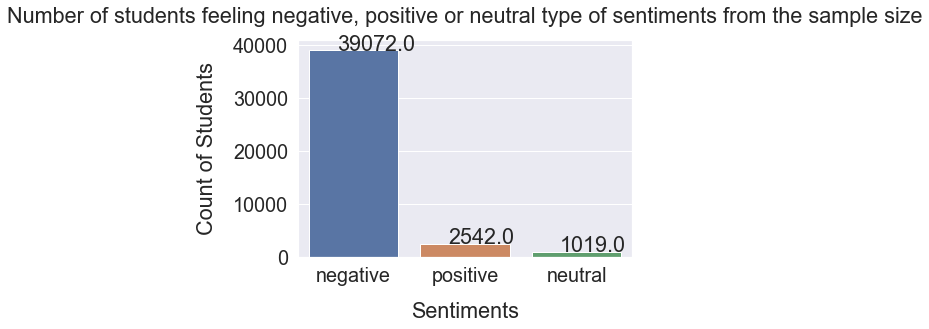

In [54]:
ax = sns.countplot(x = "sentiment", data = sentiments)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.xlabel("Sentiments", labelpad=16)
plt.ylabel("Count of Students", labelpad=16)
plt.title("Number of students feeling negative, positive or neutral type of sentiments from the sample size", y=1.05)
plt.show()

In [24]:
no_of_students_syllabus = sentiments['syllabus'].value_counts()
no_of_students_syllabus

state board    24566
cbse           16580
icse            1126
any other        351
ib                10
Name: syllabus, dtype: int64

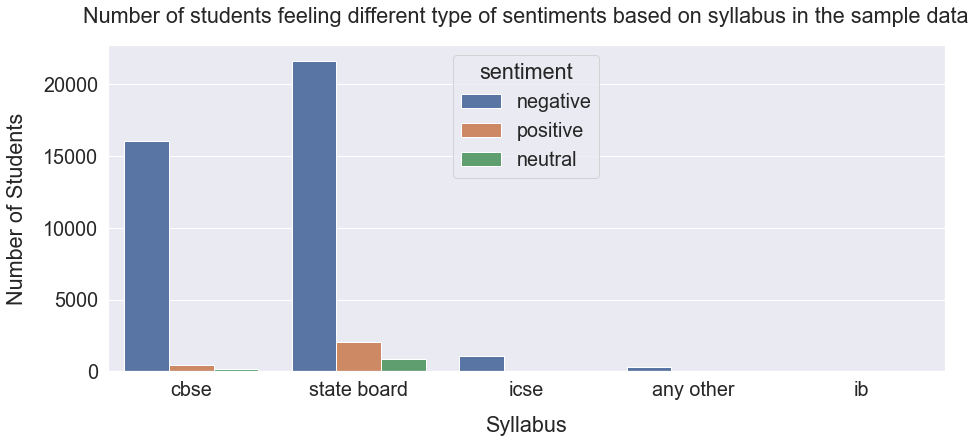

In [56]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=sentiments, x=sentiments['syllabus'], hue=sentiments['sentiment'], ax=ax)
plt.xlabel("Syllabus", labelpad=16)
plt.ylabel("Number of Students", labelpad=16)
plt.title("Number of students feeling different type of sentiments based on syllabus in the sample data", y=1.05);

### Finding number of times a student has used a keyword and grouping it by their sentiments

### Splitting the words

In [58]:
sentiments['emotions_with_punct']

2          depressed;anxious;uncertain;confused;stress;sad
3        anxious;agitated;uncertain;inability to concen...
4               anxious;agitated;uncertain;confused;stress
5        depressed;anxious;inability to concentrate;con...
6              uncertain;inability to concentrate;confused
                               ...                        
42635                                                happy
42636                                               stress
42637                                               stress
42638                                            depressed
42639    depressed;inability to concentrate;confused;st...
Name: emotions_with_punct, Length: 42633, dtype: object

In [59]:
split_emotions = sentiments['emotions_with_punct'].str.split(";")
split_emotions

2        [depressed, anxious, uncertain, confused, stre...
3        [anxious, agitated, uncertain, inability to co...
4         [anxious, agitated, uncertain, confused, stress]
5        [depressed, anxious, inability to concentrate,...
6          [uncertain, inability to concentrate, confused]
                               ...                        
42635                                              [happy]
42636                                             [stress]
42637                                             [stress]
42638                                          [depressed]
42639    [depressed, inability to concentrate, confused...
Name: emotions_with_punct, Length: 42633, dtype: object

### Word Frequency grouped by negative, neutral and positive sentiments

In [60]:
sentiments['words'] = split_emotions
word_frequency = sentiments.explode('words').groupby('sentiment')['words'].value_counts()
word_frequency

sentiment  words                    
negative   stress                       24675
           confused                     23917
           inability to concentrate     19889
           depressed                    18377
           sad                          13712
           anxious                      12314
           uncertain                     9836
           agitated                      5473
           more time for preparation     3975
           excited                        802
           relieved                       632
           happy                          607
neutral    more time for preparation      944
           excited                         82
           confused                        79
           inability to concentrate        19
           relieved                        17
           happy                           11
           anxious                          5
           depressed                        4
           stress                          

### Assigning the variables

In [61]:
word_frequency_negative = word_frequency['negative']
word_frequency_positive = word_frequency['positive']
word_frequency_neutral = word_frequency['neutral']

## Data Visualization (Word Frequency)

Text(0.5, 1.05, 'Number of times a negative sentiment student used the following keyword')

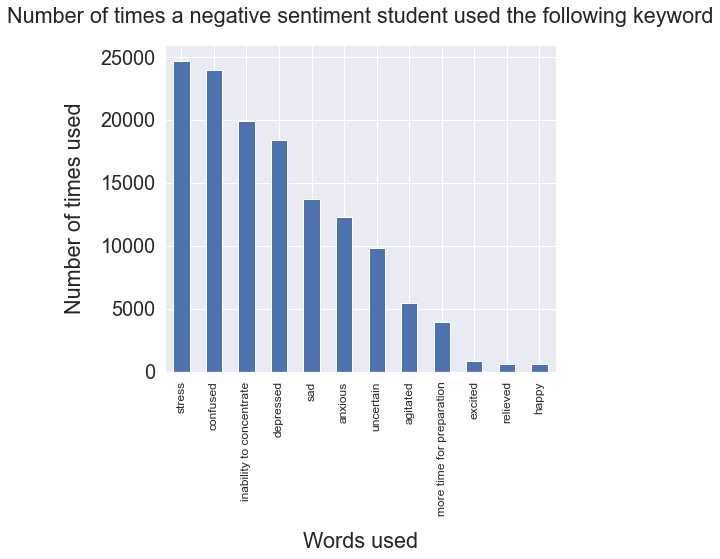

In [64]:
sns.set(font_scale=1.8)
ax = word_frequency_negative.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Words used", labelpad=16)
plt.xticks(fontsize=12, rotation = '90')
plt.ylabel("Number of times used", labelpad=16)
plt.title("Number of times a negative sentiment student used the following keyword", y=1.05)

Text(0.5, 1.05, 'Number of times a positive sentiment student used the following keyword')

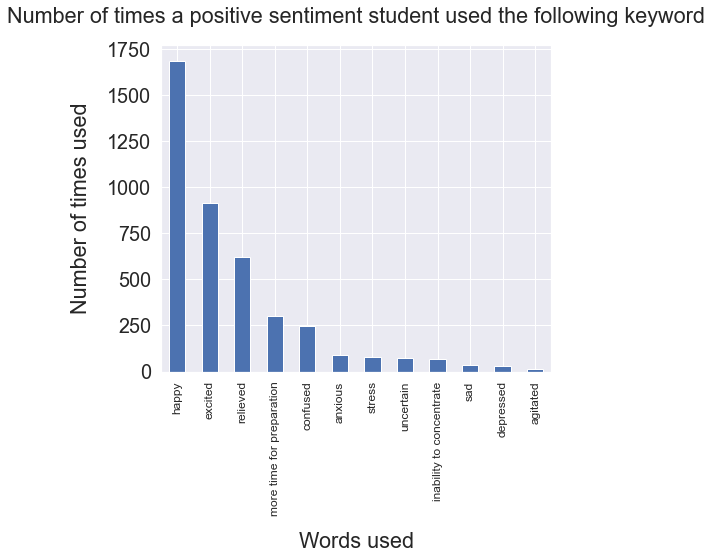

In [65]:
sns.set(font_scale=1.8)
ax = word_frequency_positive.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Words used", labelpad=16)
plt.xticks(fontsize=12, rotation = '90')
plt.ylabel("Number of times used", labelpad=16)
plt.title("Number of times a positive sentiment student used the following keyword", y=1.05)

Text(0.5, 1.05, 'Number of times a neutral sentiment student used the following keyword')

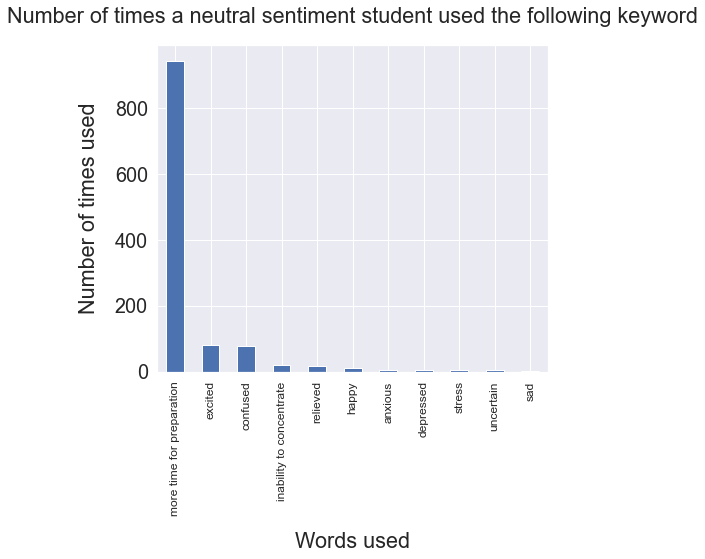

In [66]:
sns.set(font_scale=1.8)
ax = word_frequency_neutral.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Words used", labelpad=16)
plt.xticks(fontsize=12, rotation = '90')
plt.ylabel("Number of times used", labelpad=16)
plt.title("Number of times a neutral sentiment student used the following keyword", y=1.05)

# Combination of 2 and 3 words

In [67]:
sentiments.head(3)

,syllabus,emotions,opinions,emotions_with_punct,neg,pos,neu,compound,sentiment,words
2,cbse,depressed anxious uncertain confused stress sad,should be cancelled,depressed;anxious;uncertain;confused;stress;sad,1.000,0.0,0.000,-0.9287,negative,"[depressed, anxious, uncertain, confused, stre..."
3,state board,anxious agitated uncertain inability to concen...,should be cancelled,anxious;agitated;uncertain;inability to concen...,0.882,0.0,0.118,-0.9186,negative,"[anxious, agitated, uncertain, inability to co..."
4,state board,anxious agitated uncertain confused stress,should be cancelled,anxious;agitated;uncertain;confused;stress,1.000,0.0,0.000,-0.8834,negative,"[anxious, agitated, uncertain, confused, stress]"


### Converting emotions into short forms

In [68]:
shortform = sentiments['emotions']

In [69]:
sentiments['emotions'] = [w.replace('inability to concentrate', 'ITC') for w in shortform] 
sentiments['emotions'] = [w.replace('more time for preparation', 'MTFP') for w in shortform] 
sentiments['emotions']

2        depressed anxious uncertain confused stress sad
3         anxious agitated uncertain ITC confused stress
4             anxious agitated uncertain confused stress
5                  depressed anxious ITC confused stress
6                                 uncertain ITC confused
                              ...                       
42635                                              happy
42636                                             stress
42637                                             stress
42638                                          depressed
42639                  depressed ITC confused stress sad
Name: emotions, Length: 42633, dtype: object

In [70]:
sentiments.head(5)

,syllabus,emotions,opinions,emotions_with_punct,neg,pos,neu,compound,sentiment,words
2,cbse,depressed anxious uncertain confused stress sad,should be cancelled,depressed;anxious;uncertain;confused;stress;sad,1.000,0.0,0.000,-0.9287,negative,"[depressed, anxious, uncertain, confused, stre..."
3,state board,anxious agitated uncertain ITC confused stress,should be cancelled,anxious;agitated;uncertain;inability to concen...,0.882,0.0,0.118,-0.9186,negative,"[anxious, agitated, uncertain, inability to co..."
4,state board,anxious agitated uncertain confused stress,should be cancelled,anxious;agitated;uncertain;confused;stress,1.000,0.0,0.000,-0.8834,negative,"[anxious, agitated, uncertain, confused, stress]"
5,cbse,depressed anxious ITC confused stress,should be cancelled,depressed;anxious;inability to concentrate;con...,0.868,0.0,0.132,-0.9022,negative,"[depressed, anxious, inability to concentrate,..."
6,state board,uncertain ITC confused,cannot say,uncertain;inability to concentrate;confused,0.783,0.0,0.217,-0.7351,negative,"[uncertain, inability to concentrate, confused]"


### Identifying number of words used

In [71]:
sentiments['totalwords'] = [len(x.split()) for x in sentiments['emotions'].tolist()]
sentiments

,syllabus,emotions,opinions,emotions_with_punct,neg,pos,neu,compound,sentiment,words,totalwords
2,cbse,depressed anxious uncertain confused stress sad,should be cancelled,depressed;anxious;uncertain;confused;stress;sad,1.000,0.0,0.000,-0.9287,negative,"[depressed, anxious, uncertain, confused, stre...",6
3,state board,anxious agitated uncertain ITC confused stress,should be cancelled,anxious;agitated;uncertain;inability to concen...,0.882,0.0,0.118,-0.9186,negative,"[anxious, agitated, uncertain, inability to co...",6
4,state board,anxious agitated uncertain confused stress,should be cancelled,anxious;agitated;uncertain;confused;stress,1.000,0.0,0.000,-0.8834,negative,"[anxious, agitated, uncertain, confused, stress]",5
5,cbse,depressed anxious ITC confused stress,should be cancelled,depressed;anxious;inability to concentrate;con...,0.868,0.0,0.132,-0.9022,negative,"[depressed, anxious, inability to concentrate,...",5
6,state board,uncertain ITC confused,cannot say,uncertain;inability to concentrate;confused,0.783,0.0,0.217,-0.7351,negative,"[uncertain, inability to concentrate, confused]",3
...,...,...,...,...,...,...,...,...,...,...,...
42635,state board,happy,should be cancelled,happy,0.000,1.0,0.000,0.5719,positive,[happy],1
42636,state board,stress,should be cancelled,stress,1.000,0.0,0.000,-0.4215,negative,[stress],1
42637,cbse,stress,should be cancelled,stress,1.000,0.0,0.000,-0.4215,negative,[stress],1
42638,cbse,depressed,should be cancelled,depressed,1.000,0.0,0.000,-0.5106,negative,[depressed],1


### Extracting 2 words and 3 words

In [72]:
two_words = sentiments[sentiments['totalwords'] == 2]
columns1 = ['syllabus','emotions','opinions','neg','pos','neu','compound','sentiment','totalwords']
two_words = two_words[columns1]
two_words.head(5)

,syllabus,emotions,opinions,neg,pos,neu,compound,sentiment,totalwords
15,cbse,uncertain stress,cannot say,1.000,0.0,0.000,-0.6124,negative,2
29,state board,anxious uncertain,should be conducted at a later date,1.000,0.0,0.000,-0.4939,negative,2
52,state board,ITC confused,should be cancelled,0.714,0.0,0.286,-0.6124,negative,2
66,state board,excited happy,should be conducted at a later date,0.000,1.0,0.000,0.7269,positive,2
67,state board,MTFP confused,should be cancelled,0.365,0.0,0.635,-0.3182,negative,2


In [73]:
three_words = sentiments[sentiments['totalwords'] == 3]
columns2 = ['syllabus','emotions','opinions','neg','pos','neu','compound','sentiment','totalwords']
three_words = three_words[columns2]
three_words.head(5)

,syllabus,emotions,opinions,neg,pos,neu,compound,sentiment,totalwords
6,state board,uncertain ITC confused,cannot say,0.783,0.000,0.217,-0.7351,negative,3
14,state board,ITC MTFP stress,should be cancelled,0.478,0.000,0.522,-0.6705,negative,3
17,cbse,ITC confused stress,should be cancelled,0.796,0.000,0.204,-0.7783,negative,3
20,state board,excited happy MTFP,cannot say,0.000,0.604,0.396,0.7269,positive,3
24,icse,depressed confused stress,should be cancelled,1.000,0.000,0.000,-0.8126,negative,3


In [74]:
print(len(two_words))
print(len(three_words))

4259
5303


### Extracting neg and pos 2 words and 3 words

In [75]:
negative_two_words = two_words.loc[two_words['neg'] == 1.0]
positive_two_words = two_words.loc[two_words['pos'] == 1.0]
negative_three_words = three_words.loc[three_words['neg'] == 1.0]
positive_three_words = three_words.loc[three_words['pos'] == 1.0]

In [76]:
print(len(negative_two_words))
print(len(positive_two_words))
print(len(negative_three_words))
print(len(positive_three_words))

2080
206
2004
46


### Extracting mixed sentiments 2 words and 3 words

In [77]:
two_words_compound = two_words.loc[two_words['compound'].between (-0.4,0.4, inclusive = True)]
columns3 = ['syllabus','emotions','opinions','neg','pos','neu','compound','sentiment','totalwords']
two_words_compound = two_words_compound[columns3]
two_words_compound.head(5)

,syllabus,emotions,opinions,neg,pos,neu,compound,sentiment,totalwords
67,state board,MTFP confused,should be cancelled,0.365,0.000,0.635,-0.3182,negative,2
69,state board,depressed happy,should be cancelled,0.471,0.529,0.000,0.1027,positive,2
90,state board,excited confused,should be cancelled,0.489,0.511,0.000,0.0258,neutral,2
329,state board,happy confused,should be cancelled,0.383,0.617,0.000,0.3400,positive,2
381,state board,MTFP confused,should be conducted at a later date,0.365,0.000,0.635,-0.3182,negative,2


In [78]:
three_words_compound = three_words.loc[three_words['compound'].between (-0.4,0.4, inclusive = True)]
columns4 = ['syllabus','emotions','opinions','neg','pos','neu','compound','sentiment','totalwords']
three_words_compound = three_words_compound[columns4]
three_words_compound.head(5)

,syllabus,emotions,opinions,neg,pos,neu,compound,sentiment,totalwords
181,state board,happy MTFP confused,should be cancelled,0.230,0.370,0.400,0.3400,positive,3
439,state board,happy MTFP confused,should be cancelled,0.230,0.370,0.400,0.3400,positive,3
730,state board,relieved MTFP confused,should be conducted at a later date,0.258,0.292,0.449,0.0772,positive,3
885,state board,relieved ITC confused,should be cancelled,0.521,0.271,0.208,-0.3400,negative,3
907,cbse,relieved ITC MTFP,should be conducted at a later date,0.239,0.230,0.531,-0.0258,neutral,3


In [79]:
print(len(two_words_compound))
print(len(three_words_compound))

648
238


### Exporting to excel

In [80]:
columns5 = ['syllabus','emotions','opinions','neg','pos','neu','compound','sentiment']
sentiment_analysis = sentiments[columns5]
sentiment_analysis.head(5)

,syllabus,emotions,opinions,neg,pos,neu,compound,sentiment
2,cbse,depressed anxious uncertain confused stress sad,should be cancelled,1.000,0.0,0.000,-0.9287,negative
3,state board,anxious agitated uncertain ITC confused stress,should be cancelled,0.882,0.0,0.118,-0.9186,negative
4,state board,anxious agitated uncertain confused stress,should be cancelled,1.000,0.0,0.000,-0.8834,negative
5,cbse,depressed anxious ITC confused stress,should be cancelled,0.868,0.0,0.132,-0.9022,negative
6,state board,uncertain ITC confused,cannot say,0.783,0.0,0.217,-0.7351,negative


In [81]:
word_frequency

sentiment  words                    
negative   stress                       24675
           confused                     23917
           inability to concentrate     19889
           depressed                    18377
           sad                          13712
           anxious                      12314
           uncertain                     9836
           agitated                      5473
           more time for preparation     3975
           excited                        802
           relieved                       632
           happy                          607
neutral    more time for preparation      944
           excited                         82
           confused                        79
           inability to concentrate        19
           relieved                        17
           happy                           11
           anxious                          5
           depressed                        4
           stress                          

In [49]:
with pd.ExcelWriter('Sentiment_Analysis_Results.xlsx', engine='xlsxwriter') as writer:
    sentiment_analysis.to_excel(writer, sheet_name='Sheet1')
    word_frequency.to_excel(writer, sheet_name='Sheet2')
    negative_two_words.to_excel(writer, sheet_name='Sheet3')
    positive_two_words.to_excel(writer, sheet_name='Sheet4')
    negative_three_words.to_excel(writer, sheet_name='Sheet5')
    positive_three_words.to_excel(writer, sheet_name='Sheet6')
    two_words_compound.to_excel(writer, sheet_name='Sheet7')
    three_words_compound.to_excel(writer, sheet_name='Sheet8')